# Probability

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import norm
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import geom
from scipy.stats import expon
from scipy.stats import describe
from scipy.stats import find_repeats
from scipy.stats import relfreq

In [18]:
import warnings
warnings.filterwarnings('ignore')

## normal

In [33]:
norm.ppf(0.2,loc=0,scale=1)        #percent point function (cummulative prob point)
norm.cdf(-1,loc=0,scale=1)         #cumulative density function
norm.sf(1,loc=0,scale=1)           #survive function 
norm.interval(0.95,loc=1,scale=1)  #confidence interval

(-0.959963984540054, 2.959963984540054)

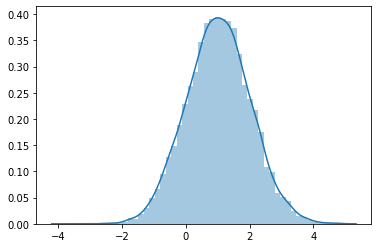

In [153]:
normal=norm.rvs(loc=1,scale=1,size=10000,random_state=13) 
sns.distplot(normal)
plt.show()

### Binomial

 
###### 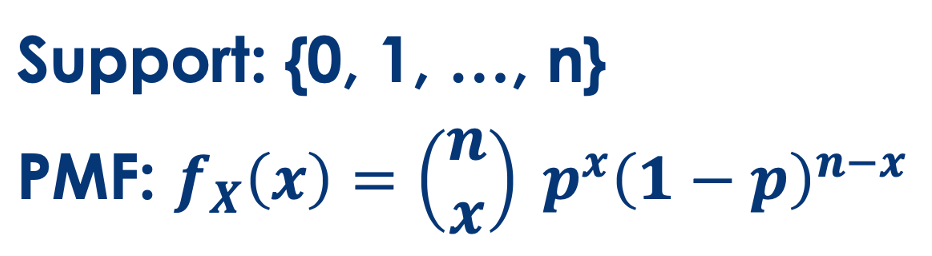

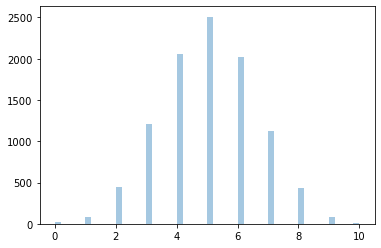

In [5]:
from scipy.stats import binom

binomial=binom.rvs(n=10,p=0.5,size=10000,random_state=42)
sns.distplot(binomial,kde=False)
plt.show()

In [9]:
# probabilty of # heads after 10 throws with prob=0.5
print('PMF:',binom.pmf(k=3,n=10,p=0.5)) 
print('CDF',binom.cdf(k=3,n=10,p=0.5))
print('SF',binom.sf(k=3,n=10,p=0.5))

PMF: 0.11718750000000014
CDF 0.17187499999999994
SF 0.828125


In [10]:
# given indivudual prob=0.5 and trials=100, cummulative prob=0.6, 
# what is the expected cummulative value
binom.ppf(n=100,p=0.5,q=0.6) 

51.0

## Geometric
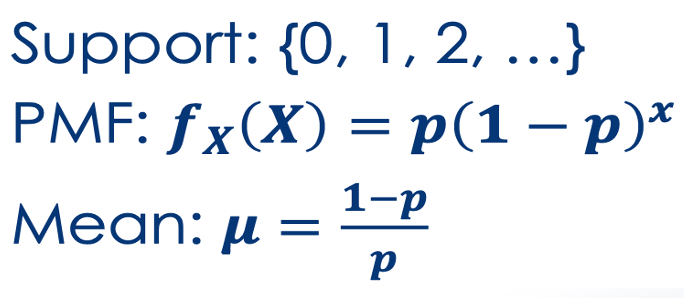

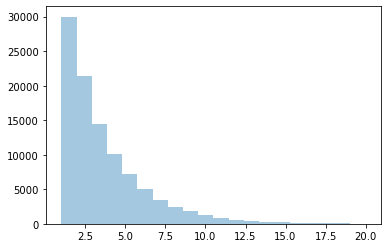

In [49]:
from scipy.stats import geom

geometric=geom.rvs(p=0.3,size=100000)
sns.distplot(geometric,bins=np.linspace(1,20,21),kde=False)
plt.show()

In [50]:
print('PMF:',geom.pmf(k=7,p=0.2))
print('CDF:',geom.cdf(k=7,p=0.2))
print('SF:',geom.sf(k=7,p=0.2))

PMF: 0.052428800000000025
CDF: 0.7902848000000001
SF: 0.20971519999999993


### possion

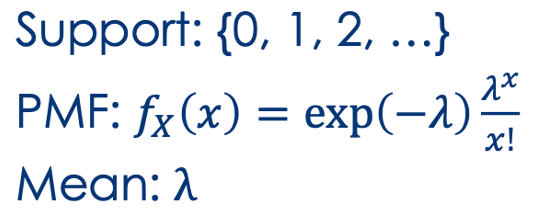

In [32]:
from scipy.stats import poisson

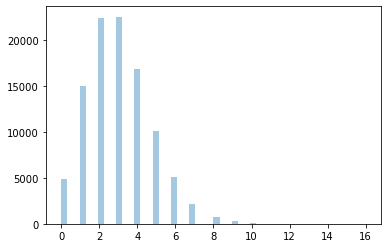

In [10]:
poisson_sample=poisson.rvs(mu=3,size=100000)
sns.distplot(poisson_sample,kde=False)
plt.show()

In [20]:
print('PMF:',poisson.pmf(k=1,mu=3))
print('CDF:',poisson.cdf(k=1,mu=3))
print('SF:',poisson.sf(k=1,mu=3))

PMF: 0.14936120510359185
CDF: 0.1991482734714558
SF: 0.8008517265285442


### exponential
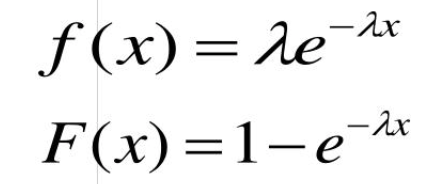

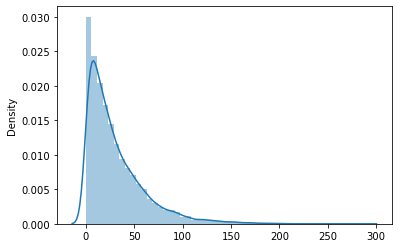

In [55]:
exponential=expon.rvs(scale=30, size=10000)
sns.distplot(exponential,kde=True)
plt.show()

In [85]:
print('CDF:',expon.cdf(60,scale=30))
print('SF:',expon.sf(60,scale=30))

CDF: 0.8646647167633873
SF: 0.1353352832366127


In [83]:
# 30 - 60分钟进球
print('30 - 60分钟进第一个球的概率:',
      expon.cdf(60,scale=30)-expon.cdf(30,scale=30))

# 
print('已知道前30分钟没进球，后30分钟进球的概率:',
      (1-expon.cdf(30,scale=30))* expon.cdf(30,scale=30))

30 - 60分钟进第一个球的概率: 0.23254415793482963
已知道前30分钟没进球，后30分钟进球的概率: 0.23254415793482963


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.font_manager as fm
f = "/System/Library/Fonts/PingFang.ttc"
prop = fm.FontProperties(fname=f)

In [29]:
import chineseize_matplotlib

## Bayes

In [37]:
content={'性别':[1,1,1,1,0,0,0,0,0,0],
       '抽烟': [1,1,1,0,0,0,0,0,1,1],
       '症状':[1,1,1,0,0,1,0,0,0,1]}
df=pd.DataFrame(content)
df['性别']=df['性别'].map({1:'男',0:'女'})
df['抽烟']=df['抽烟'].map({1:'有烟瘾',0:'无烟瘾'})
df['症状']=df['症状'].map({1:'支气管疾病',0:'良好'})
df

,性别,抽烟,症状
0,男,有烟瘾,支气管疾病
1,男,有烟瘾,支气管疾病
2,男,有烟瘾,支气管疾病
3,男,无烟瘾,良好
4,女,无烟瘾,良好
5,女,无烟瘾,支气管疾病
6,女,无烟瘾,良好
7,女,无烟瘾,良好
8,女,有烟瘾,良好
9,女,有烟瘾,支气管疾病


### 
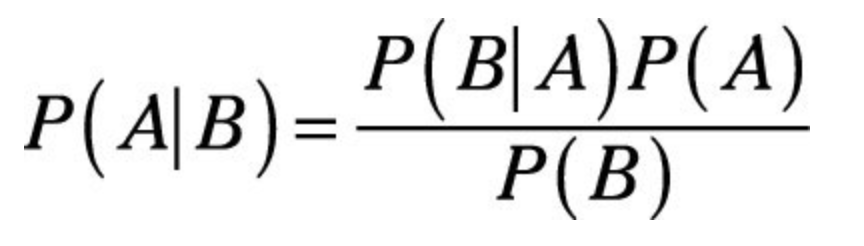

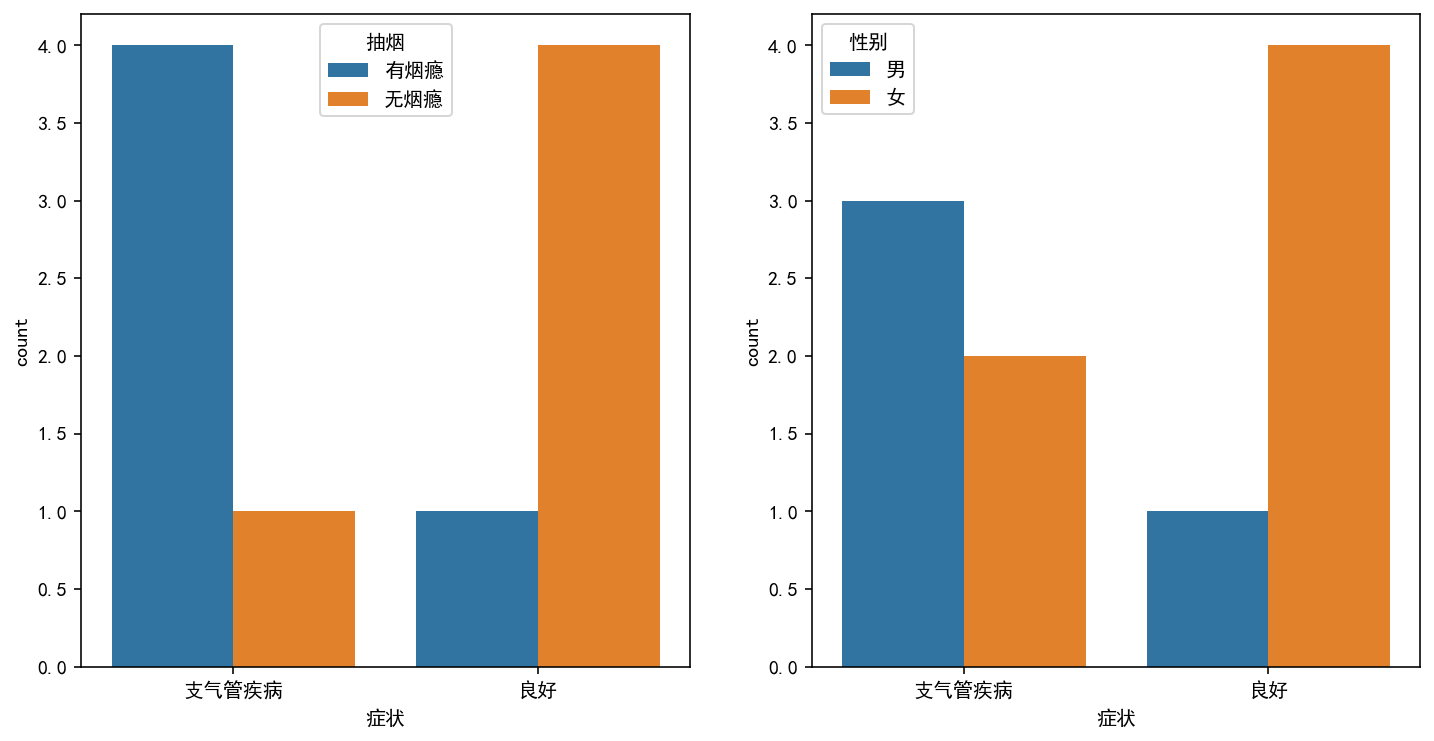

In [38]:
ax = plt.subplots(1,2,figsize=(12,6))
plt.subplot(1,2,1)
sns.countplot(data=df,x='症状',hue='抽烟')
plt.subplot(1,2,2)
sns.countplot(data=df,x='症状',hue='性别')
plt.show()

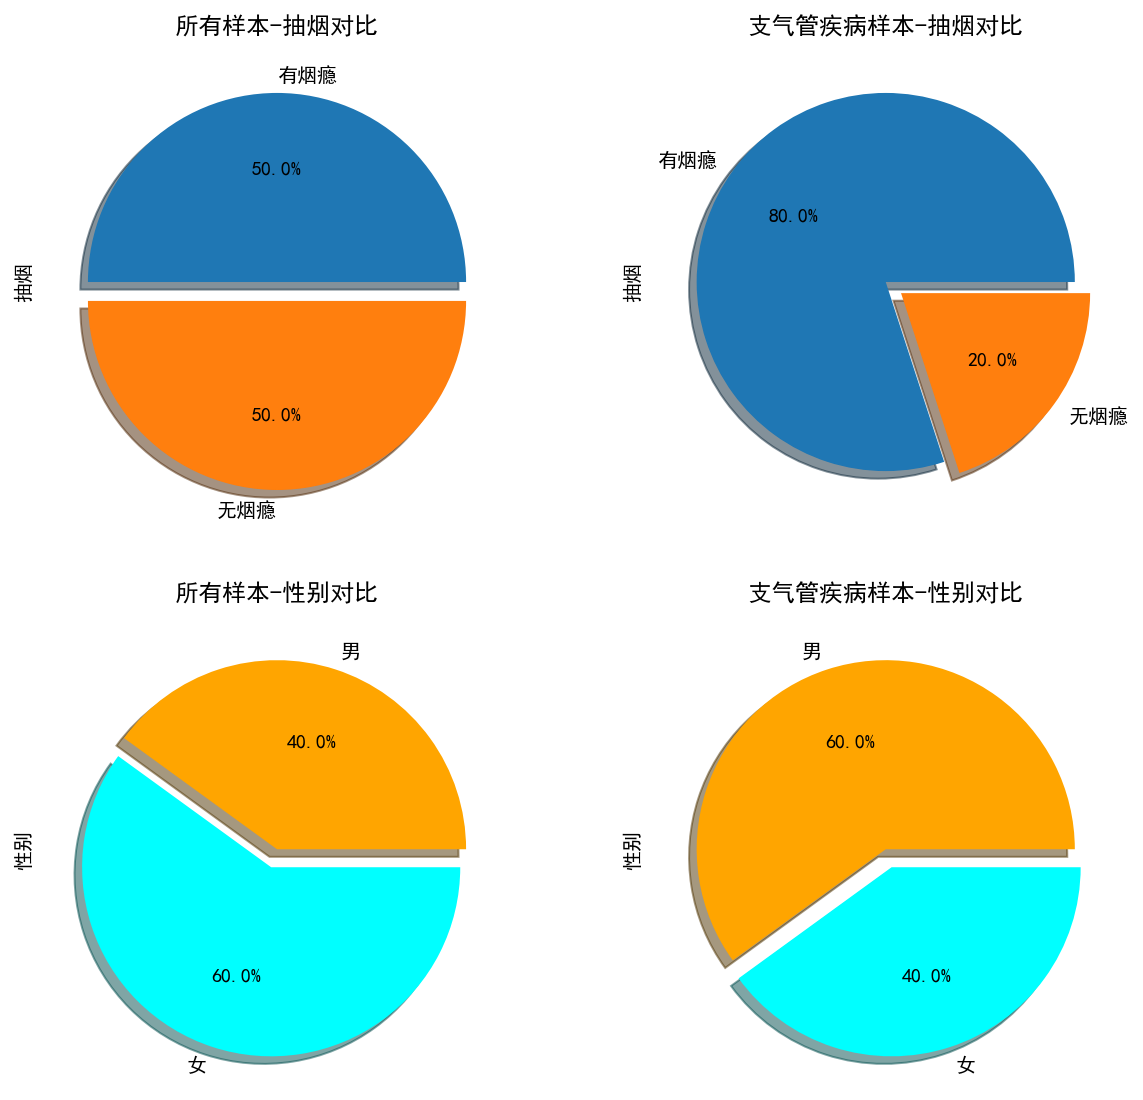

In [62]:
ax = plt.subplots(figsize=(10,20))
plt.subplot(4,2,1)
df['抽烟'].value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True,explode=[0,0.1])
plt.title('所有样本-抽烟对比')
plt.subplot(4,2,2)
df[df['症状']=='支气管疾病']['抽烟'].value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True,explode=[0,0.1])
plt.title('支气管疾病样本-抽烟对比')
#
plt.subplot(4,2,3)
df['性别'].value_counts().sort_values().plot(kind='pie',autopct='%1.1f%%',shadow=True,explode=[0,0.1],colors=["orange", "cyan"])
plt.title('所有样本-性别对比')
plt.subplot(4,2,4)
df[df['症状']=='支气管疾病']['性别'].value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True,explode=[0,0.1],colors=["orange", "cyan"])
plt.title('支气管疾病样本-性别对比')

plt.show()